In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
old_df = pd.read_csv('C:/Users/HOME/Desktop/excel_files/world-happiness-report.csv')
new_df = pd.read_csv('C:/Users/HOME/Desktop/excel_files/world-happiness-report-2021.csv')

In [3]:
set(new_df)

{'Country name',
 'Dystopia + residual',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Healthy life expectancy',
 'Explained by: Log GDP per capita',
 'Explained by: Perceptions of corruption',
 'Explained by: Social support',
 'Freedom to make life choices',
 'Generosity',
 'Healthy life expectancy',
 'Ladder score',
 'Ladder score in Dystopia',
 'Logged GDP per capita',
 'Perceptions of corruption',
 'Regional indicator',
 'Social support',
 'Standard error of ladder score',
 'lowerwhisker',
 'upperwhisker'}

In [4]:
#country name, log gdp per capita, year, generosity, perceptions of corruption, social support, life expectancy?, life ladder?
#happiness = y = dependent variable

In [5]:
old_df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [6]:
new_df['Ladder_rounded'] = round(new_df['Ladder score'])

In [7]:
old_df['Ladder_rounded'] = round(old_df['Life Ladder'])

In [8]:
new_df[['Ladder_rounded', 'Logged GDP per capita']].groupby('Ladder_rounded').mean().sort_values(by='Logged GDP per capita', ascending=False)


,Logged GDP per capita
Ladder_rounded,
8.0,10.925750
7.0,10.828667
6.0,9.910400
5.0,8.897600
3.0,8.274000
4.0,8.039900


In [9]:
new_df[['Ladder_rounded', 'Social support']].groupby('Ladder_rounded').mean().sort_values(by='Social support', ascending=False)

,Social support
Ladder_rounded,
8.0,0.958250
7.0,0.921429
6.0,0.875200
5.0,0.762480
4.0,0.689050
3.0,0.637250


In [10]:
new_df[['Ladder_rounded', 'Healthy life expectancy']].groupby('Ladder_rounded').mean().sort_values(by='Healthy life expectancy', ascending=False)

,Healthy life expectancy
Ladder_rounded,
8.0,73.025000
7.0,71.977952
6.0,68.471120
5.0,61.715400
3.0,57.340750
4.0,57.080050


In [11]:
new_df[['Ladder_rounded', 'Freedom to make life choices']].groupby('Ladder_rounded').mean().sort_values(by='Freedom to make life choices', ascending=False)

,Freedom to make life choices
Ladder_rounded,
8.0,0.94225
7.0,0.88600
6.0,0.82184
5.0,0.75362
4.0,0.70100
3.0,0.69500


In [12]:
new_df[['Ladder_rounded', 'Generosity']].groupby('Ladder_rounded').mean().sort_values(by='Generosity', ascending=False)

,Generosity
Ladder_rounded,
4.0,0.037750
7.0,0.037429
8.0,0.029250
5.0,-0.001880
6.0,-0.069700
3.0,-0.083500


In [13]:
new_df[['Ladder_rounded', 'Perceptions of corruption']].groupby('Ladder_rounded').mean().sort_values(by='Perceptions of corruption', ascending=False)


,Perceptions of corruption
Ladder_rounded,
5.0,0.780740
6.0,0.779780
4.0,0.759900
3.0,0.678250
7.0,0.529667
8.0,0.332500


In [14]:
old_df[['Ladder_rounded', 'Log GDP per capita']].groupby('Ladder_rounded').mean().sort_values(by='Log GDP per capita', ascending=False)

,Log GDP per capita
Ladder_rounded,
8.0,10.865118
7.0,10.601044
6.0,9.871602
5.0,8.989663
4.0,8.158536
3.0,7.717259
2.0,7.697000


In [15]:
old_df[['Ladder_rounded', 'Social support']].groupby('Ladder_rounded').mean().sort_values(by='Social support', ascending=False)

,Social support
Ladder_rounded,
8.0,0.952760
7.0,0.914985
6.0,0.867334
5.0,0.780285
4.0,0.706655
3.0,0.613316
2.0,0.420000


In [16]:
old_df[['Ladder_rounded', 'Healthy life expectancy at birth']].groupby('Ladder_rounded').mean().sort_values(by='Healthy life expectancy at birth', ascending=False)

,Healthy life expectancy at birth
Ladder_rounded,
8.0,71.823529
7.0,70.463739
6.0,66.932869
5.0,61.152120
4.0,55.770066
3.0,53.698246
2.0,52.400000


In [17]:
old_df[['Ladder_rounded', 'Freedom to make life choices']].groupby('Ladder_rounded').mean().sort_values(by='Freedom to make life choices', ascending=False)

,Freedom to make life choices
Ladder_rounded,
8.0,0.933353
7.0,0.853935
6.0,0.771450
5.0,0.695047
4.0,0.665860
3.0,0.650684
2.0,0.394000


In [18]:
old_df[['Ladder_rounded', 'Generosity']].groupby('Ladder_rounded').mean().sort_values(by='Generosity', ascending=False)

,Generosity
Ladder_rounded,
8.0,0.151490
7.0,0.089266
3.0,0.010426
4.0,-0.001896
5.0,-0.027030
6.0,-0.038620
2.0,-0.108000


In [19]:
old_df[['Ladder_rounded', 'Perceptions of corruption']].groupby('Ladder_rounded').mean().sort_values(by='Perceptions of corruption', ascending=False)

,Perceptions of corruption
Ladder_rounded,
2.0,0.924000
5.0,0.809238
6.0,0.795266
4.0,0.787628
3.0,0.747518
7.0,0.582409
8.0,0.332353


In [20]:
sum(old_df.isnull().values)


array([  0,   0,   0,  36,  13,  55,  32,  89, 110,  22,  16,   0])

In [21]:
old_df[old_df['Perceptions of corruption'].isna()==True]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Ladder_rounded
28,Algeria,2014,6.355,9.335,0.818,65.14,NaN,NaN,NaN,0.626,0.177,6.0
29,Algeria,2016,5.341,9.362,0.749,65.50,NaN,NaN,NaN,0.661,0.377,5.0
112,Bahrain,2014,6.165,10.783,NaN,67.42,NaN,NaN,NaN,NaN,NaN,6.0
113,Bahrain,2015,6.007,10.785,0.853,67.70,0.850,0.112,NaN,0.716,0.303,6.0
114,Bahrain,2016,6.170,10.781,0.863,68.10,0.889,0.088,NaN,0.787,0.283,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,Vietnam,2015,5.076,8.770,0.849,67.30,NaN,0.086,NaN,0.642,0.232,5.0
1905,Vietnam,2017,5.175,8.876,NaN,67.70,NaN,NaN,NaN,NaN,NaN,5.0
1908,Yemen,2007,4.477,8.214,0.825,53.40,0.673,0.011,NaN,0.592,0.379,4.0
1916,Yemen,2016,3.826,7.715,0.775,55.10,0.533,-0.151,NaN,0.469,0.228,4.0


In [22]:
old_df[old_df['Perceptions of corruption'].isna()==True]

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Ladder_rounded
28,Algeria,2014,6.355,9.335,0.818,65.14,NaN,NaN,NaN,0.626,0.177,6.0
29,Algeria,2016,5.341,9.362,0.749,65.50,NaN,NaN,NaN,0.661,0.377,5.0
112,Bahrain,2014,6.165,10.783,NaN,67.42,NaN,NaN,NaN,NaN,NaN,6.0
113,Bahrain,2015,6.007,10.785,0.853,67.70,0.850,0.112,NaN,0.716,0.303,6.0
114,Bahrain,2016,6.170,10.781,0.863,68.10,0.889,0.088,NaN,0.787,0.283,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,Vietnam,2015,5.076,8.770,0.849,67.30,NaN,0.086,NaN,0.642,0.232,5.0
1905,Vietnam,2017,5.175,8.876,NaN,67.70,NaN,NaN,NaN,NaN,NaN,5.0
1908,Yemen,2007,4.477,8.214,0.825,53.40,0.673,0.011,NaN,0.592,0.379,4.0
1916,Yemen,2016,3.826,7.715,0.775,55.10,0.533,-0.151,NaN,0.469,0.228,4.0


In [23]:
set(old_df) #just seeing column names

{'Country name',
 'Freedom to make life choices',
 'Generosity',
 'Healthy life expectancy at birth',
 'Ladder_rounded',
 'Life Ladder',
 'Log GDP per capita',
 'Negative affect',
 'Perceptions of corruption',
 'Positive affect',
 'Social support',
 'year'}

In [24]:
CC = pd.read_csv("C:/Users/HOME/Desktop/excel_files/countryContinent.csv")
CC = CC[['country', 'continent']]
CC = CC.rename(columns={"country":"Country name"})
list1 = {'Trinidad and Tobago':'Trinidad & Tobago', 'Hong Kong S.A.R. of China':'Hong Kong', 'Macedonia':'North Macedonia', 'Taiwan Province of China':'Taiwan'}
#CC['Country name'] = CC['Country name'].str.replace('Trinidad & Tobago', 'Trinidad and Tobago')

In [25]:
#changing country names of CC to match old_df, allows us to extract continent to corresponding country
def replace_country(list1, df):
    for k, v in list1.items():
        df['Country name'] = df['Country name'].replace(v,k)
    return df

In [26]:
replace_country(list1, CC)

,Country name,continent
0,Afghanistan,Asia
1,?land Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
244,Wallis and Futuna,Oceania
245,Western Sahara,Africa
246,Yemen,Asia
247,Zambia,Africa


In [27]:
CC

,Country name,continent
0,Afghanistan,Asia
1,?land Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania
...,...,...
244,Wallis and Futuna,Oceania
245,Western Sahara,Africa
246,Yemen,Asia
247,Zambia,Africa


In [28]:
old_df = old_df.merge(CC, on="Country name", how="left")

In [29]:
old_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Ladder_rounded,continent
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,4.0,Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,4.0,Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,5.0,Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,4.0,Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,4.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,4.0,Africa
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,4.0,Africa
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,4.0,Africa
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,3.0,Africa


In [30]:
#list of countries with no continent value
set(old_df['Country name'][old_df['continent'].isna()==True])

{'Kosovo', 'North Cyprus', 'North Macedonia', 'Somaliland region'}

In [31]:
print(CC[CC['Country name']=='Somalia'])
print(CC[CC['Country name']=='Macedonia'])
print(CC[CC['Country name']=='Cyprus'])

    Country name continent
204      Somalia    Africa
    Country name continent
131    Macedonia    Europe
   Country name continent
58       Cyprus      Asia


In [32]:
#replace na values with continent
old_df.loc[old_df['Country name'] == 'Somaliland region', 'continent'] = 'Africa'
old_df.loc[old_df['Country name'] == 'North Macedonia', 'continent'] = 'Europe'
old_df.loc[old_df['Country name'] == 'North Cyprus', 'continent'] = 'Asia'
old_df.loc[old_df['Country name'] == 'Kosovo', 'continent'] = 'Europe'

In [33]:
#there are now no more na continent values
set(old_df['Country name'][old_df['continent'].isna()==True])

set()

In [34]:
old_df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Ladder_rounded,continent
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,4.0,Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,4.0,Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,5.0,Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,4.0,Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,4.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,4.0,Africa
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,4.0,Africa
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,4.0,Africa
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235,3.0,Africa


In [35]:
#try to see which continents have higher or lower life ladder
cont_avg = old_df[['continent', 'Life Ladder']].groupby('continent', as_index=False).mean().sort_values(by='Life Ladder', ascending=False)
cont_avg

,continent,Life Ladder
4,Oceania,7.296179
3,Europe,6.151265
1,Americas,6.114868
2,Asia,5.296399
0,Africa,4.370642


In [36]:
prism = plt.get_cmap('prism',256)

In [37]:
prism(0.5)

(1.0, 0.8450918051812084, 0.0, 1.0)

In [38]:
def my_barchart(my_df, my_cmap): #revisit
    rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(my_df['continent'], my_df['Life Ladder'], color=my_cmap(rescale(my_df['Life Ladder'])))

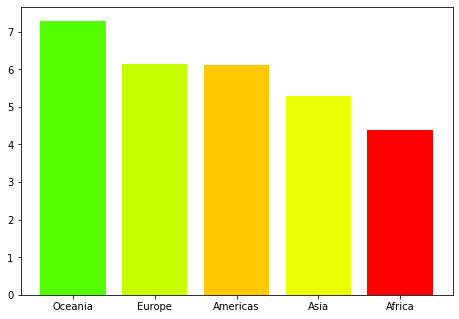

In [39]:
my_barchart(cont_avg, prism) #wow africa 

In [40]:
plt_df = old_df.copy()
plt_df.set_index('year', inplace=True)

Country name
Afghanistan    AxesSubplot(0.125,0.125;0.775x0.755)
Albania        AxesSubplot(0.125,0.125;0.775x0.755)
Algeria        AxesSubplot(0.125,0.125;0.775x0.755)
Angola         AxesSubplot(0.125,0.125;0.775x0.755)
Argentina      AxesSubplot(0.125,0.125;0.775x0.755)
                               ...                 
Venezuela      AxesSubplot(0.125,0.125;0.775x0.755)
Vietnam        AxesSubplot(0.125,0.125;0.775x0.755)
Yemen          AxesSubplot(0.125,0.125;0.775x0.755)
Zambia         AxesSubplot(0.125,0.125;0.775x0.755)
Zimbabwe       AxesSubplot(0.125,0.125;0.775x0.755)
Name: Life Ladder, Length: 166, dtype: object

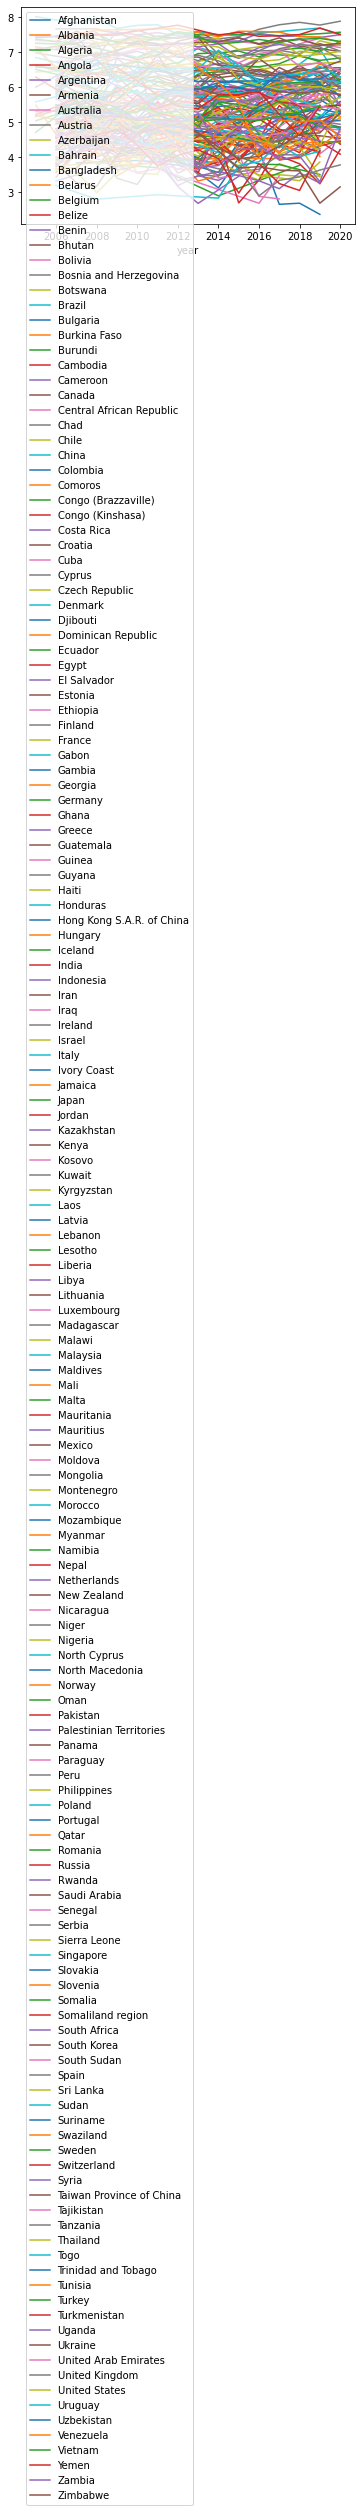

In [41]:
plt_df.groupby('Country name')['Life Ladder'].plot(legend=True)

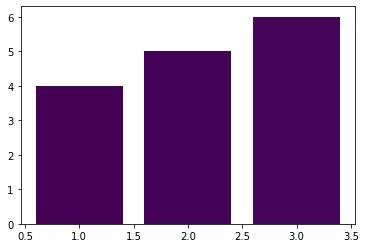

In [42]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

my_cmap = plt.get_cmap("viridis")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

plt.bar(x, y, color=my_cmap.colors)
plt.savefig("temp")

Country name
Algeria                     AxesSubplot(0.125,0.125;0.775x0.755)
Angola                      AxesSubplot(0.125,0.125;0.775x0.755)
Benin                       AxesSubplot(0.125,0.125;0.775x0.755)
Botswana                    AxesSubplot(0.125,0.125;0.775x0.755)
Burkina Faso                AxesSubplot(0.125,0.125;0.775x0.755)
Burundi                     AxesSubplot(0.125,0.125;0.775x0.755)
Cameroon                    AxesSubplot(0.125,0.125;0.775x0.755)
Central African Republic    AxesSubplot(0.125,0.125;0.775x0.755)
Chad                        AxesSubplot(0.125,0.125;0.775x0.755)
Comoros                     AxesSubplot(0.125,0.125;0.775x0.755)
Congo (Brazzaville)         AxesSubplot(0.125,0.125;0.775x0.755)
Congo (Kinshasa)            AxesSubplot(0.125,0.125;0.775x0.755)
Djibouti                    AxesSubplot(0.125,0.125;0.775x0.755)
Egypt                       AxesSubplot(0.125,0.125;0.775x0.755)
Ethiopia                    AxesSubplot(0.125,0.125;0.775x0.755)
Gabon       

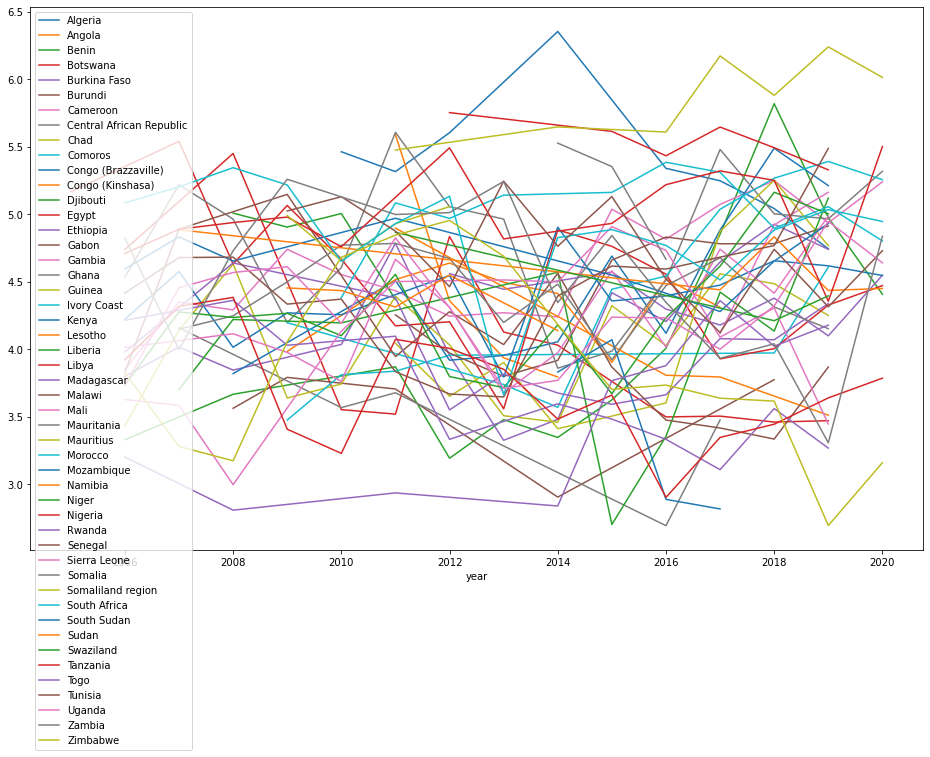

In [43]:
#want to see whats up with africa
plt_df[plt_df['continent']=='Africa'].groupby('Country name')['Life Ladder'].plot(legend=True,figsize=(16,10))
#hard to read. need fix. maybe top and bot 5 average life ladder

In [44]:
#blah

In [45]:
plt_df[plt_df['continent']=='Africa']

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Ladder_rounded,continent
year,,,,,,,,,,,,
2010,Algeria,5.464,9.287,NaN,64.50,0.593,-0.205,0.618,NaN,NaN,5.0,Africa
2011,Algeria,5.317,9.297,0.810,64.66,0.530,-0.181,0.638,0.550,0.255,5.0,Africa
2012,Algeria,5.605,9.311,0.839,64.82,0.587,-0.172,0.690,0.604,0.230,6.0,Africa
2014,Algeria,6.355,9.335,0.818,65.14,NaN,NaN,NaN,0.626,0.177,6.0,Africa
2016,Algeria,5.341,9.362,0.749,65.50,NaN,NaN,NaN,0.661,0.377,5.0,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Zimbabwe,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,4.0,Africa
2017,Zimbabwe,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,4.0,Africa
2018,Zimbabwe,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,4.0,Africa


In [46]:
old_df['year'].value_counts()

2017    147
2011    146
2014    145
2019    144
2015    143
2018    142
2016    142
2012    142
2013    137
2010    124
2009    114
2008    110
2007    102
2020     95
2006     89
2005     27
Name: year, dtype: int64

Country name
Algeria                     AxesSubplot(0.125,0.125;0.775x0.755)
Angola                      AxesSubplot(0.125,0.125;0.775x0.755)
Benin                       AxesSubplot(0.125,0.125;0.775x0.755)
Botswana                    AxesSubplot(0.125,0.125;0.775x0.755)
Burkina Faso                AxesSubplot(0.125,0.125;0.775x0.755)
Burundi                     AxesSubplot(0.125,0.125;0.775x0.755)
Cameroon                    AxesSubplot(0.125,0.125;0.775x0.755)
Central African Republic    AxesSubplot(0.125,0.125;0.775x0.755)
Chad                        AxesSubplot(0.125,0.125;0.775x0.755)
Comoros                     AxesSubplot(0.125,0.125;0.775x0.755)
Congo (Brazzaville)         AxesSubplot(0.125,0.125;0.775x0.755)
Congo (Kinshasa)            AxesSubplot(0.125,0.125;0.775x0.755)
Djibouti                    AxesSubplot(0.125,0.125;0.775x0.755)
Egypt                       AxesSubplot(0.125,0.125;0.775x0.755)
Ethiopia                    AxesSubplot(0.125,0.125;0.775x0.755)
Gabon       

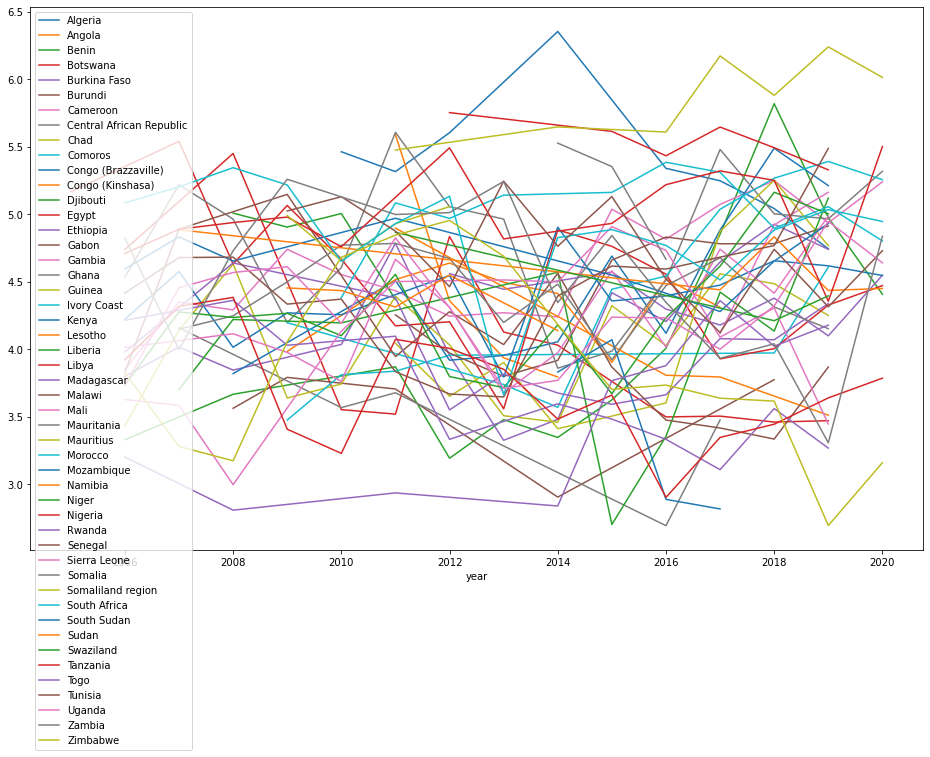

In [47]:
#graph of top5 life ladder score
plt_df[plt_df['continent']=='Africa'].groupby('Country name')['Life Ladder'].plot(legend=True,figsize=(16,10))


In [48]:
plt_df[plt_df['continent']=='Africa'].groupby('Country name', as_index=False).mean().sort_values(by='Life Ladder',ascending=False)
#Mauritius, Libya, Algeria, Somalia, Morocco top5
#Rwanda, Togo, Burundi, Central African Republic, South Sudan bot5

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Ladder_rounded
28,Mauritius,5.863857,9.937429,0.863714,66.000000,0.858000,0.061429,0.828857,0.775429,0.190714,5.857143
23,Libya,5.545667,9.525500,0.845500,62.360000,0.771833,-0.059667,0.699000,0.704833,0.374500,5.500000
0,Algeria,5.389875,9.328875,0.803571,65.290000,0.519167,-0.144333,0.691000,0.608429,0.262286,5.250000
37,Somalia,5.183333,NaN,0.601333,49.900000,0.919667,NaN,0.435667,0.875333,0.195667,5.333333
29,Morocco,5.019800,8.850600,0.627778,65.030000,0.726400,-0.216500,0.819400,0.661556,0.286556,4.900000
33,Nigeria,5.013538,8.499462,0.755692,47.500000,0.675385,0.064923,0.894462,0.750846,0.233000,5.000000
38,Somaliland region,4.909000,NaN,0.820750,NaN,0.795500,NaN,0.418750,0.768000,0.117250,5.000000
39,South Africa,4.873000,9.432867,0.867533,53.046667,0.744667,-0.115267,0.842929,0.780733,0.225800,4.933333
12,Djibouti,4.822500,7.932500,0.741333,54.010000,0.733000,0.004750,0.581500,0.665333,0.177667,4.750000
17,Ghana,4.819000,8.367000,0.689400,55.220000,0.802800,0.069733,0.861467,0.715000,0.227467,4.866667


In [49]:
#countries need at least 4 elements to be included
def at_least(df,col): #maybe do constructor instead?
    value = col.value_counts()
    return df[col.isin(value.index[value>(4)])]

In [50]:
plt_df = at_least(plt_df, plt_df['Country name'])

In [51]:
plt_df

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Ladder_rounded,continent
year,,,,,,,,,,,,
2008,Afghanistan,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,4.0,Asia
2009,Afghanistan,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,4.0,Asia
2010,Afghanistan,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,5.0,Asia
2011,Afghanistan,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,4.0,Asia
2012,Afghanistan,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,4.0,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...
2016,Zimbabwe,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209,4.0,Africa
2017,Zimbabwe,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224,4.0,Africa
2018,Zimbabwe,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212,4.0,Africa


In [52]:
top5 = plt_df[plt_df['continent']=='Africa'].groupby('Country name', as_index=False).mean().sort_values(by='Life Ladder',ascending=False).head()
bot5 = plt_df[plt_df['continent']=='Africa'].groupby('Country name', as_index=False).mean().sort_values(by='Life Ladder',ascending=False).tail()


Country name
Algeria      AxesSubplot(0.125,0.125;0.775x0.755)
Libya        AxesSubplot(0.125,0.125;0.775x0.755)
Mauritius    AxesSubplot(0.125,0.125;0.775x0.755)
Morocco      AxesSubplot(0.125,0.125;0.775x0.755)
Nigeria      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Life Ladder, dtype: object

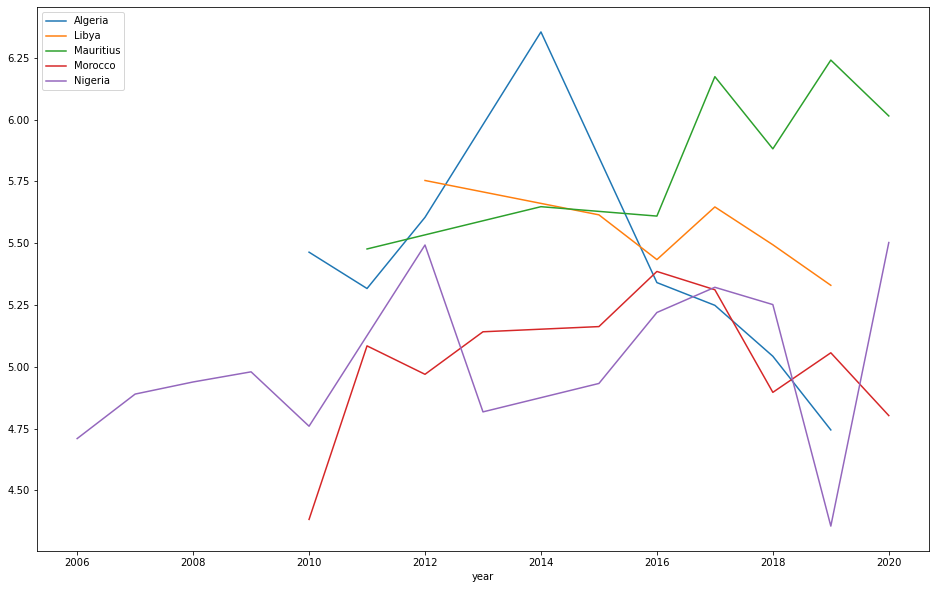

In [53]:
plt_df[plt_df['Country name'].isin(top5['Country name'])].groupby('Country name')['Life Ladder'].plot(legend=True,figsize=(16,10))


Country name
Burundi                     AxesSubplot(0.125,0.125;0.775x0.755)
Central African Republic    AxesSubplot(0.125,0.125;0.775x0.755)
Rwanda                      AxesSubplot(0.125,0.125;0.775x0.755)
Tanzania                    AxesSubplot(0.125,0.125;0.775x0.755)
Togo                        AxesSubplot(0.125,0.125;0.775x0.755)
Name: Life Ladder, dtype: object

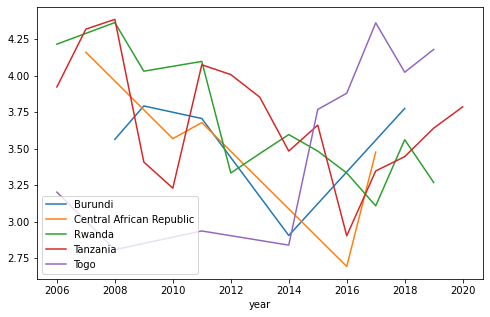

In [54]:
plt_df[plt_df['Country name'].isin(bot5['Country name'])].groupby('Country name')['Life Ladder'].plot(legend=True,figsize=(8,5))


In [55]:
new_df.drop(['Standard error of ladder score', 
             'upperwhisker', 
             'lowerwhisker',
             'Dystopia + residual',
             'Explained by: Freedom to make life choices',
             'Explained by: Generosity',
             'Explained by: Healthy life expectancy',
             'Explained by: Log GDP per capita',
             'Explained by: Perceptions of corruption',
             'Explained by: Social support',
             'Ladder score in Dystopia',
             'Ladder_rounded',
             'Regional indicator',
             'Standard error of ladder score'
            ], inplace=True, axis=1)
new_df.rename({'Healthy life expectancy':'Healthy life expectancy at birth',
              'Ladder score':'Life Ladder',
              'Logged GDP per capita':'Log GDP per capita'
              }, inplace=True, axis=1)
oldreg_df = old_df.drop(['Ladder_rounded', 
                       'year', 
                       'Positive affect', 
                       'Negative affect'], axis=1)

In [56]:
oldreg_df = at_least(oldreg_df,oldreg_df['Country name'])
oldreg_df = oldreg_df[oldreg_df['Country name'].isin(new_df['Country name'])]
oldreg_df.groupby('Country name').mean().sort_values('Life Ladder', ascending=False)

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
Country name,,,,,,,
Denmark,7.680400,10.879200,0.957133,71.169333,0.945067,0.170929,0.200467
Finland,7.597154,10.749923,0.949000,71.180000,0.939692,0.003077,0.249000
Switzerland,7.548300,11.095400,0.943600,73.334000,0.924700,0.106400,0.305900
Norway,7.512400,11.039100,0.950500,72.670000,0.954400,0.136100,0.344200
Netherlands,7.466286,10.886786,0.933500,71.707143,0.907429,0.276385,0.414929
...,...,...,...,...,...,...,...
Tanzania,3.697333,7.700200,0.763800,54.173333,0.714067,0.132400,0.767733
Rwanda,3.654417,7.451083,0.619417,57.586667,0.867917,0.012364,0.186000
Afghanistan,3.594667,7.650833,0.508417,52.266667,0.518167,0.070083,0.843333


In [57]:
new_df = new_df[new_df['Country name'].isin(oldreg_df['Country name'])]

In [58]:
sum(old_df.isnull().values)

array([  0,   0,   0,  36,  13,  55,  32,  89, 110,  22,  16,   0,   0])

In [59]:
oldreg_df[oldreg_df.isnull().values]

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,continent
25,Algeria,5.464,9.287,NaN,64.50,0.593,-0.205,0.618,Africa
28,Algeria,6.355,9.335,0.818,65.14,NaN,NaN,NaN,Africa
28,Algeria,6.355,9.335,0.818,65.14,NaN,NaN,NaN,Africa
28,Algeria,6.355,9.335,0.818,65.14,NaN,NaN,NaN,Africa
29,Algeria,5.341,9.362,0.749,65.50,NaN,NaN,NaN,Africa
...,...,...,...,...,...,...,...,...,...
1917,Yemen,3.254,7.578,0.790,55.90,0.595,-0.147,NaN,Asia
1918,Yemen,3.058,NaN,0.789,56.70,0.553,NaN,0.793,Asia
1918,Yemen,3.058,NaN,0.789,56.70,0.553,NaN,0.793,Asia
1919,Yemen,4.197,NaN,0.870,57.50,0.651,NaN,0.798,Asia


In [60]:
oldreg_df.dropna()

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,continent
0,Afghanistan,3.724,7.370,0.451,50.80,0.718,0.168,0.882,Asia
1,Afghanistan,4.402,7.540,0.552,51.20,0.679,0.190,0.850,Asia
2,Afghanistan,4.758,7.647,0.539,51.60,0.600,0.121,0.707,Asia
3,Afghanistan,3.832,7.620,0.521,51.92,0.496,0.162,0.731,Asia
4,Afghanistan,3.783,7.705,0.521,52.24,0.531,0.236,0.776,Asia
...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,Africa
1945,Zimbabwe,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,Africa
1946,Zimbabwe,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,Africa
1947,Zimbabwe,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,Africa


In [61]:
oldreg_df[oldreg_df.isnull().values]

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,continent
25,Algeria,5.464,9.287,NaN,64.50,0.593,-0.205,0.618,Africa
28,Algeria,6.355,9.335,0.818,65.14,NaN,NaN,NaN,Africa
28,Algeria,6.355,9.335,0.818,65.14,NaN,NaN,NaN,Africa
28,Algeria,6.355,9.335,0.818,65.14,NaN,NaN,NaN,Africa
29,Algeria,5.341,9.362,0.749,65.50,NaN,NaN,NaN,Africa
...,...,...,...,...,...,...,...,...,...
1917,Yemen,3.254,7.578,0.790,55.90,0.595,-0.147,NaN,Asia
1918,Yemen,3.058,NaN,0.789,56.70,0.553,NaN,0.793,Asia
1918,Yemen,3.058,NaN,0.789,56.70,0.553,NaN,0.793,Asia
1919,Yemen,4.197,NaN,0.870,57.50,0.651,NaN,0.798,Asia


In [62]:
def complete_col(df): #trying to fill na values by average of existing country's values
    df_means = pd.DataFrame({'Country name': list(set(df['Country name']))})
    for col in df.drop(['Country name','continent'], axis=1):
        #dfnonull=df[['Country name', col]] #drop na values
        means = df[['Country name', col]].groupby('Country name').mean() #list of means for each col
        df_means = df_means.merge(means, on='Country name', how='left') #add list into old df
    return(df_means)
reg_nonull = complete_col(oldreg_df) #list of means for each col for each country, use to complete values

In [63]:
dictCC = dict(zip(old_df['Country name'], old_df['continent']))
dictCC

{'Afghanistan': 'Asia',
 'Albania': 'Europe',
 'Algeria': 'Africa',
 'Angola': 'Africa',
 'Argentina': 'Americas',
 'Armenia': 'Asia',
 'Australia': 'Oceania',
 'Austria': 'Europe',
 'Azerbaijan': 'Asia',
 'Bahrain': 'Asia',
 'Bangladesh': 'Asia',
 'Belarus': 'Europe',
 'Belgium': 'Europe',
 'Belize': 'Americas',
 'Benin': 'Africa',
 'Bhutan': 'Asia',
 'Bolivia': 'Americas',
 'Bosnia and Herzegovina': 'Europe',
 'Botswana': 'Africa',
 'Brazil': 'Americas',
 'Bulgaria': 'Europe',
 'Burkina Faso': 'Africa',
 'Burundi': 'Africa',
 'Cambodia': 'Asia',
 'Cameroon': 'Africa',
 'Canada': 'Americas',
 'Central African Republic': 'Africa',
 'Chad': 'Africa',
 'Chile': 'Americas',
 'China': 'Asia',
 'Colombia': 'Americas',
 'Comoros': 'Africa',
 'Congo (Brazzaville)': 'Africa',
 'Congo (Kinshasa)': 'Africa',
 'Costa Rica': 'Americas',
 'Croatia': 'Europe',
 'Cuba': 'Americas',
 'Cyprus': 'Asia',
 'Czech Republic': 'Europe',
 'Denmark': 'Europe',
 'Djibouti': 'Africa',
 'Dominican Republic': 'Ame

In [64]:
reg_nonull['continent']=''
for i in reg_nonull['Country name']:
    reg_nonull.loc[reg_nonull['Country name']==i, 'continent']=dictCC[i]

In [65]:
reg_nonull[reg_nonull.isnull().values]
reg_nonull[reg_nonull['Country name'] == 'North Cyprus']

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,continent
61,North Cyprus,5.651571,NaN,0.825857,NaN,0.781286,NaN,0.692143,Asia


In [66]:
reg_nonull[reg_nonull['continent']=='Asia']['Log GDP per capita'].mean()

9.398911011739584

In [67]:
def complete2(df):
    for col in df.drop(['Country name', 'continent'], axis=1):
        for i,j in zip(df[col],df['Country name']):
            if pd.isnull(i) == True: #find na value
                cont_temp = dictCC[j]
                cont_mean = df[df['continent']==cont_temp][col].mean()
                df.loc[df['Country name']==j, col] = cont_mean
    return(df)
complete2(reg_nonull)
#reg_nonull2 = complete2(reg_nonull)


,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,continent
0,Tanzania,3.697333,7.700200,0.763800,54.173333,0.714067,0.132400,0.767733,Africa
1,Argentina,6.310133,10.033800,0.904400,67.900000,0.768200,-0.159867,0.842067,Americas
2,Haiti,3.954182,7.446727,0.616182,47.049091,0.461636,0.307636,0.752091,Americas
3,Kyrgyzstan,5.169867,8.412933,0.869067,62.333333,0.781867,0.017333,0.903067,Asia
4,Belarus,5.571071,9.760071,0.906714,63.750000,0.661929,-0.168929,0.671143,Europe
...,...,...,...,...,...,...,...,...,...
140,United Kingdom,6.917600,10.688467,0.945333,71.508000,0.851400,0.311429,0.481133,Europe
141,Switzerland,7.548300,11.095400,0.943600,73.334000,0.924700,0.106400,0.305900,Europe
142,Cambodia,4.250800,8.076333,0.719067,59.380000,0.937714,0.164067,0.853857,Asia
143,Slovenia,6.053615,10.449538,0.928769,70.046154,0.914077,-0.021385,0.842154,Europe


In [68]:
reg_nonull[reg_nonull.isnull().values]

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,continent


In [69]:
oldreg_df[oldreg_df['Country name']=='Algeria']['Generosity'].mean()

-0.14433333333333334

In [70]:
oldreg_df[oldreg_df['continent']=='Asia']['Generosity'].mean()

0.029626185958254305

In [71]:
reg_nonull[reg_nonull['Country name']=='Algeria']['Generosity'] #confirming our function worked properly

96   -0.144333
Name: Generosity, dtype: float64

In [72]:
print(sum(new_df.isnull().values))
print(sum(reg_nonull.isnull().values))
new_df[new_df.isnull().values] #no na values in new_df

[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0]


,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption


In [73]:
#reg_nonull = reg_nonull.merge(old_df[['Country name', 'continent']], on='Country name', how='left')

reg_nonull[reg_nonull.isnull().values]

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,continent


In [74]:
oldreg_df[oldreg_df['Country name'] == 'Turkmenistan']

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,continent
1768,Turkmenistan,6.568,8.989,0.924,59.44,NaN,-0.102,NaN,Asia
1769,Turkmenistan,5.792,9.182,0.964,60.04,NaN,0.018,NaN,Asia
1770,Turkmenistan,5.464,9.269,0.946,60.28,0.786,-0.123,NaN,Asia
1771,Turkmenistan,5.392,9.348,0.846,60.52,0.705,-0.071,NaN,Asia
1772,Turkmenistan,5.787,9.427,0.909,60.76,0.805,0.032,NaN,Asia
1773,Turkmenistan,5.791,9.472,0.960,61.00,0.701,0.093,NaN,Asia
1774,Turkmenistan,5.887,9.515,0.929,61.40,0.749,0.005,NaN,Asia
1775,Turkmenistan,5.229,9.561,0.908,61.80,0.720,0.066,NaN,Asia
1776,Turkmenistan,4.621,9.605,0.984,62.20,0.858,0.260,NaN,Asia
1777,Turkmenistan,5.474,9.651,0.982,62.60,0.892,0.285,NaN,Asia


In [75]:
reg_nonull

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,continent
0,Tanzania,3.697333,7.700200,0.763800,54.173333,0.714067,0.132400,0.767733,Africa
1,Argentina,6.310133,10.033800,0.904400,67.900000,0.768200,-0.159867,0.842067,Americas
2,Haiti,3.954182,7.446727,0.616182,47.049091,0.461636,0.307636,0.752091,Americas
3,Kyrgyzstan,5.169867,8.412933,0.869067,62.333333,0.781867,0.017333,0.903067,Asia
4,Belarus,5.571071,9.760071,0.906714,63.750000,0.661929,-0.168929,0.671143,Europe
...,...,...,...,...,...,...,...,...,...
140,United Kingdom,6.917600,10.688467,0.945333,71.508000,0.851400,0.311429,0.481133,Europe
141,Switzerland,7.548300,11.095400,0.943600,73.334000,0.924700,0.106400,0.305900,Europe
142,Cambodia,4.250800,8.076333,0.719067,59.380000,0.937714,0.164067,0.853857,Asia
143,Slovenia,6.053615,10.449538,0.928769,70.046154,0.914077,-0.021385,0.842154,Europe


In [76]:
reg_nonull['Log GDP per capita'].max()

11.607090909090909

In [77]:
import math
def freedman_bins(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr= q3-q1
    #return(col)
    bin_width = 2*iqr/math.pow(len(col), 1/3)
    #return(bin_width)
    bin_n = math.ceil((max(col)-min(col))/bin_width)
    return(bin_n)
freedman_bins(reg_nonull['Log GDP per capita'])

7

In [78]:
q1, q3 = np.percentile(reg_nonull['Log GDP per capita'], [25, 75])
iqr = q3 - q1
bin_width = (2 * iqr) / (len(reg_nonull['Log GDP per capita']) ** (1 / 3))
bin_count = int(np.ceil((reg_nonull['Log GDP per capita'].max() - reg_nonull['Log GDP per capita'].min()) / bin_width))
bin_count

7

In [79]:
#creating bands
reg_nonull['GDPBins'] = pd.cut(reg_nonull['Log GDP per capita'], freedman_bins(reg_nonull['Log GDP per capita'])) #create age bands and correlate with survival rate
GDPgroupO = reg_nonull[['GDPBins', 'Life Ladder']].groupby(['GDPBins'], as_index=False).mean().sort_values(by='GDPBins', ascending=True)

In [80]:
temp_df = reg_nonull.copy()

In [81]:
temp_df

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,continent,GDPBins
0,Tanzania,3.697333,7.700200,0.763800,54.173333,0.714067,0.132400,0.767733,Africa,"(7.42, 8.118]"
1,Argentina,6.310133,10.033800,0.904400,67.900000,0.768200,-0.159867,0.842067,Americas,"(9.514, 10.211]"
2,Haiti,3.954182,7.446727,0.616182,47.049091,0.461636,0.307636,0.752091,Americas,"(7.42, 8.118]"
3,Kyrgyzstan,5.169867,8.412933,0.869067,62.333333,0.781867,0.017333,0.903067,Asia,"(8.118, 8.816]"
4,Belarus,5.571071,9.760071,0.906714,63.750000,0.661929,-0.168929,0.671143,Europe,"(9.514, 10.211]"
...,...,...,...,...,...,...,...,...,...,...
140,United Kingdom,6.917600,10.688467,0.945333,71.508000,0.851400,0.311429,0.481133,Europe,"(10.211, 10.909]"
141,Switzerland,7.548300,11.095400,0.943600,73.334000,0.924700,0.106400,0.305900,Europe,"(10.909, 11.607]"
142,Cambodia,4.250800,8.076333,0.719067,59.380000,0.937714,0.164067,0.853857,Asia,"(7.42, 8.118]"
143,Slovenia,6.053615,10.449538,0.928769,70.046154,0.914077,-0.021385,0.842154,Europe,"(10.211, 10.909]"


In [82]:
set(reg_nonull['Log GDP per capita'])

{6.722399999999999,
 6.883916666666667,
 6.985357142857143,
 7.00725,
 7.239222222222221,
 7.29511111111111,
 7.355166666666666,
 7.365818181818182,
 7.420214285714286,
 7.446727272727273,
 7.451083333333333,
 7.526333333333334,
 7.527615384615386,
 7.574066666666666,
 7.650833333333334,
 7.6550769230769244,
 7.6945555555555565,
 7.700199999999998,
 7.850333333333333,
 7.857533333333333,
 7.8656428571428565,
 7.969642857142857,
 7.985916666666667,
 7.991166666666667,
 8.066857142857144,
 8.076333333333332,
 8.101066666666666,
 8.102700000000002,
 8.1286,
 8.171299999999999,
 8.198066666666666,
 8.330357142857142,
 8.367,
 8.393333333333334,
 8.402750000000001,
 8.412933333333333,
 8.42022222222222,
 8.489133333333333,
 8.499461538461539,
 8.512384615384615,
 8.540285714285714,
 8.547214285714286,
 8.585307692307692,
 8.648111111111112,
 8.655285714285716,
 8.8196,
 8.850599999999998,
 8.8976,
 8.955428571428572,
 8.9688,
 9.122785714285712,
 9.127076923076922,
 9.1645,
 9.1745,
 9.1936

In [83]:
#creating bands
reg_nonull['SSBins'] = pd.cut(reg_nonull['Social support'], freedman_bins(reg_nonull['Social support'])) #create age bands and correlate with survival rate
SSgroupO = reg_nonull[['SSBins', 'Life Ladder']].groupby(['SSBins'], as_index=False).mean().sort_values(by='SSBins', ascending=True)

In [84]:
reg_nonull['HLEBins'] = pd.cut(reg_nonull['Healthy life expectancy at birth'], freedman_bins(reg_nonull['Healthy life expectancy at birth'])) #create age bands and correlate with survival rate
HLEgroupO = reg_nonull[['HLEBins', 'Life Ladder']].groupby(['HLEBins'], as_index=False).mean().sort_values(by='HLEBins', ascending=True)

In [85]:
reg_nonull['FLCBins'] = pd.cut(reg_nonull['Freedom to make life choices'], freedman_bins(reg_nonull['Freedom to make life choices'])) #create age bands and correlate with survival rate
FLCgroupO = reg_nonull[['FLCBins', 'Life Ladder']].groupby(['FLCBins'], as_index=False).mean().sort_values(by='FLCBins', ascending=True)

In [86]:
reg_nonull['GenBins'] = pd.cut(reg_nonull['Generosity'], freedman_bins(reg_nonull['Generosity'])) #create age bands and correlate with survival rate
GengroupO = reg_nonull[['GenBins', 'Life Ladder']].groupby(['GenBins'], as_index=False).mean().sort_values(by='GenBins', ascending=True)

In [87]:
reg_nonull['PCBins'] = pd.cut(reg_nonull['Perceptions of corruption'], freedman_bins(reg_nonull['Perceptions of corruption'])) #create age bands and correlate with survival rate
PCgroupO = reg_nonull[['PCBins', 'Life Ladder']].groupby(['PCBins'], as_index=False).mean().sort_values(by='PCBins', ascending=True)

In [88]:
new_df['GDPBins'] = pd.cut(new_df['Log GDP per capita'], freedman_bins(new_df['Log GDP per capita'])) #create age bands and correlate with survival rate
GDPgroupN = new_df[['GDPBins', 'Life Ladder']].groupby(['GDPBins'], as_index=False).mean().sort_values(by='GDPBins', ascending=True)

In [89]:
new_df['SSBins'] = pd.cut(new_df['Social support'], freedman_bins(new_df['Social support'])) #create age bands and correlate with survival rate
SSgroupN = new_df[['SSBins', 'Life Ladder']].groupby(['SSBins'], as_index=False).mean().sort_values(by='SSBins', ascending=True)

In [90]:
new_df['HLEBins'] = pd.cut(new_df['Healthy life expectancy at birth'], freedman_bins(new_df['Healthy life expectancy at birth'])) #create age bands and correlate with survival rate
HLEgroupN = new_df[['HLEBins', 'Life Ladder']].groupby(['HLEBins'], as_index=False).mean().sort_values(by='HLEBins', ascending=True)

In [91]:
new_df['FLCBins'] = pd.cut(new_df['Freedom to make life choices'], freedman_bins(new_df['Freedom to make life choices'])) #create age bands and correlate with survival rate
FLCgroupN = new_df[['FLCBins', 'Life Ladder']].groupby(['FLCBins'], as_index=False).mean().sort_values(by='FLCBins', ascending=True)

In [92]:
new_df['GenBins'] = pd.cut(new_df['Generosity'], freedman_bins(new_df['Generosity'])) #create age bands and correlate with survival rate
GengroupN = new_df[['GenBins', 'Life Ladder']].groupby(['GenBins'], as_index=False).mean().sort_values(by='GenBins', ascending=True)

In [93]:
new_df['PCBins'] = pd.cut(new_df['Perceptions of corruption'], freedman_bins(new_df['Perceptions of corruption'])) #create age bands and correlate with survival rate
PCgroupN = new_df[['PCBins', 'Life Ladder']].groupby(['PCBins'], as_index=False).mean().sort_values(by='PCBins', ascending=True)

In [94]:
temp_df = reg_nonull.copy()

In [95]:
def create_bins(df, col, itv):
    for i in range(len(df[col])):
        if df[col].iloc[i]>itv[len(itv)-1].left:
            df[col].iloc[i] = len(itv)
        else:
            for j in range(len(itv)-1):
                if df[col].iloc[i] in itv[j]:
                    df[col].iloc[i] = j+1
"""
def create_bins(df, col, itv):
    return(len(itv))
    df.loc[df[col]>itv[len(itv)-1].left, col] = len(itv)
    for i in range(len(itv)-1):
        df.loc[(df[col]<=itv[i].right) & (df[col]>itv[i].left), col] = i+1 #only for middle
"""
create_bins(reg_nonull, 'Log GDP per capita', GDPgroupO['GDPBins'])
create_bins(reg_nonull, 'Social support', SSgroupO['SSBins'])
create_bins(reg_nonull, 'Healthy life expectancy at birth', HLEgroupO['HLEBins'])
create_bins(reg_nonull, 'Freedom to make life choices', FLCgroupO['FLCBins'])
create_bins(reg_nonull, 'Generosity', GengroupO['GenBins'])
create_bins(reg_nonull, 'Perceptions of corruption', PCgroupO['PCBins'])

C:\Users\HOME\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [96]:
create_bins(new_df, 'Log GDP per capita', GDPgroupN['GDPBins'])
create_bins(new_df, 'Social support', SSgroupN['SSBins'])
create_bins(new_df, 'Healthy life expectancy at birth', HLEgroupN['HLEBins'])
create_bins(new_df, 'Freedom to make life choices', FLCgroupN['FLCBins'])
create_bins(new_df, 'Generosity', GengroupN['GenBins'])
create_bins(new_df, 'Perceptions of corruption', PCgroupN['PCBins'])

In [97]:
reg_nonull['Life Ladder'] = round(reg_nonull['Life Ladder'])

In [98]:
reg_nonull = reg_nonull.drop(['GDPBins', 'SSBins', 'HLEBins', 'FLCBins', 'GenBins', 'PCBins', 'Country name'], axis=1)
new_df = new_df.drop(['GDPBins', 'SSBins', 'HLEBins', 'FLCBins', 'GenBins', 'PCBins'], axis=1)

In [99]:
#olddum_df = reg_nonull.drop('continent', axis=1)
olddum_df = pd.get_dummies(reg_nonull)

In [100]:
olddum_df

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,4.0,2.0,7.0,3.0,5.0,7.0,12.0,1,0,0,0,0
1,6.0,5.0,9.0,6.0,6.0,2.0,14.0,0,1,0,0,0
2,4.0,2.0,4.0,1.0,1.0,10.0,12.0,0,1,0,0,0
3,5.0,3.0,9.0,5.0,6.0,5.0,15.0,0,0,1,0,0
4,6.0,5.0,9.0,5.0,4.0,2.0,11.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
140,7.0,6.0,10.0,7.0,7.0,10.0,7.0,0,0,0,1,0
141,8.0,7.0,10.0,8.0,8.0,7.0,4.0,0,0,0,1,0
142,4.0,2.0,6.0,4.0,8.0,7.0,14.0,0,0,1,0,0
143,6.0,6.0,10.0,7.0,8.0,5.0,14.0,0,0,0,1,0


In [101]:
new_df = new_df.merge(CC, on='Country name', how='left').drop(['Country name'], axis=1)
newdum_df = pd.get_dummies(new_df)

In [102]:
newdum_df

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,7.842,6.0,9.0,8.0,10.0,3.0,2.0,0,0,0,1,0
1,7.620,7.0,9.0,8.0,10.0,5.0,2.0,0,0,0,1,0
2,7.571,7.0,9.0,9.0,10.0,5.0,4.0,0,0,0,1,0
3,7.554,6.0,9.0,8.0,10.0,6.0,9.0,0,0,0,1,0
4,7.464,7.0,9.0,8.0,10.0,7.0,4.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
140,3.600,1.0,2.0,3.0,7.0,5.0,10.0,1,0,0,0,0
141,3.467,5.0,6.0,4.0,8.0,1.0,11.0,1,0,0,0,0
142,3.415,2.0,2.0,5.0,9.0,5.0,2.0,1,0,0,0,0
143,3.145,2.0,5.0,3.0,6.0,4.0,12.0,1,0,0,0,0


In [118]:
Y_train = olddum_df['Life Ladder']
Y_test = newdum_df['Life Ladder']
X_train = olddum_df.drop(['Life Ladder'], axis=1)
X_test = newdum_df.drop(['Life Ladder'], axis=1)

In [104]:
reg_nonull.describe()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,5.475862,4.234483,7.517241,5.303448,5.200000,4.917241,11.765517
std,1.093432,1.637299,2.061901,1.973168,1.917029,2.313918,3.188551
min,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,3.000000,6.000000,4.000000,4.000000,3.000000,11.000000
50%,5.000000,4.000000,8.000000,6.000000,5.000000,5.000000,13.000000
75%,6.000000,6.000000,9.000000,7.000000,7.000000,6.000000,14.000000
max,8.000000,7.000000,10.000000,8.000000,8.000000,14.000000,15.000000


In [105]:
temp_df = pd.DataFrame({'x':['blue', 'red'], 'y':['square', 'circle']})
temp_df
pd.get_dummies(temp_df)

,x_blue,x_red,y_circle,y_square
0,1,0,0,1
1,0,1,1,0


In [106]:
olddum_df

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,continent_Africa,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,4.0,2.0,7.0,3.0,5.0,7.0,12.0,1,0,0,0,0
1,6.0,5.0,9.0,6.0,6.0,2.0,14.0,0,1,0,0,0
2,4.0,2.0,4.0,1.0,1.0,10.0,12.0,0,1,0,0,0
3,5.0,3.0,9.0,5.0,6.0,5.0,15.0,0,0,1,0,0
4,6.0,5.0,9.0,5.0,4.0,2.0,11.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
140,7.0,6.0,10.0,7.0,7.0,10.0,7.0,0,0,0,1,0
141,8.0,7.0,10.0,8.0,8.0,7.0,4.0,0,0,0,1,0
142,4.0,2.0,6.0,4.0,8.0,7.0,14.0,0,0,1,0,0
143,6.0,6.0,10.0,7.0,8.0,5.0,14.0,0,0,0,1,0


In [115]:
#Linear Regression, use new_df
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test) 
#acc_log = round(linreg.score(X_train, Y_train) * 100, 2)
#acc_log #confidence score of 70.34

In [128]:
print(olddum_df.drop(['Life Ladder'], axis=1).columns)
print('coefficients: ', model.coef_)
print('intercept: ', model.intercept_)
print('mse: %.2f' % mean_squared_error(Y_test, Y_pred))
print('R_sq: %.2f' % r2_score(Y_test, Y_pred))

Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'continent_Africa',
       'continent_Americas', 'continent_Asia', 'continent_Europe',
       'continent_Oceania'],
      dtype='object')
coefficients:  [ 0.22942512  0.08059796  0.09474053  0.06482478  0.00680522 -0.05690983
 -0.25514949  0.38981627 -0.24716219  0.11982646 -0.00733106]
intercept:  3.74312555892011
mse: 0.29
R_sq: 0.74


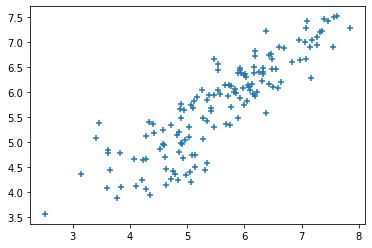

In [131]:
plt.scatter(Y_test, Y_pred, marker='+')